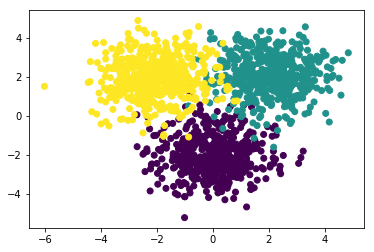

In [47]:
import numpy as np
import matplotlib.pyplot as plt
NClass=500
D=2
M=4
K=3
X1=np.random.randn(NClass,2)+np.array([0,-2])
X2=np.random.randn(NClass,2)+np.array([2,2])
X3=np.random.randn(NClass,2)+np.array([-2,2])
X=np.concatenate((X1,X2,X3))
y=np.array([0]*NClass+[1]*NClass+[2]*NClass)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()
def sigmoid(z):
    return (1/(1+np.exp(-z)))
def softmax(a):
    expa=np.exp(a)
    return expa/expa.sum(axis=1,keepdims=True)
def feed_forward(X,W1,W2,b1,b2):
    z=sigmoid(X.dot(W1)+b1)
    y=softmax(z.dot(W2)+b2)
    return y,z
def class_rate(y,y_pred):
    n_c=0
    n_t=0
    for i in range(len(y)):
        n_t+=1
        if y[i]==y_pred[i]:
            n_c+=1
    return (n_c/n_t)
def one_hot_encoder(X):
    N=len(X)
    D=len(np.unique(X))
    Z=np.zeros((N,D))
    for i in range(N):
        x=X[i]
        Z[i,x]=1
    return Z
def costJ(y,y_p):
    return (y*np.log(y_p)).sum()
    

In [48]:
y=one_hot_encoder(y)

In [49]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [94]:
# M = no. of nodes in hidden layer
# D = Dimension
# K = no. of classes of target
# N = no. of observations
W1=np.random.randn(D,M)
b1=np.random.randn(M)
W2=np.random.randn(M,K)
b2=np.random.randn(K)
y_pred,Z_pred=feed_forward(X,W1,W2,b1,b2)
y_p=y_pred.argmax(axis=1)
class_rate(y.argmax(axis=1),y_p)
costJ(y,y_pred)

-2918.5404058082668

In [68]:
(Z_pred*(1-Z_pred))

array([[8.35373224e-03, 2.47552827e-01, 6.08785986e-03, 1.73247086e-04],
       [2.25539264e-01, 2.44346805e-01, 2.25205581e-01, 7.14374722e-02],
       [2.33219207e-01, 2.15471833e-01, 2.47536637e-01, 1.59907537e-03],
       ...,
       [5.41017177e-02, 2.43362521e-01, 2.42333062e-01, 1.32860362e-01],
       [3.88423372e-02, 2.01571196e-01, 6.00874973e-02, 1.38994000e-04],
       [8.26390487e-03, 2.29677463e-01, 1.55294592e-01, 1.62933099e-01]])

In [43]:
y_p

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [55]:
# slow method
def derivativeW2(y,y_p,z):
    N,K=y.shape
    M= z.shape[1]
    ret1=np.zeros((M,K))
    for n in range(N):
        for m in range(M):
            for k in range(K):
                ret1[m,k]+=(y[n,k]-y_p[n,k])*z[n,m]
    return ret1
def derivativeb2(y,y_pred):
    return (y-y_pred).sum(axis=0)
def derivativeW1(y,y_p,z,W2,X):
    N,D=X.shape
    M,K=W2.shape
    ret1=np.zeros((D,M))
    for n in range(N):
        for k in range(K):
            for m in range(M):
                for d in range(D):
                    ret1[d,m]+=(y[n,k]-y_p[n,k])*W2[m,k]*z[n,m]*(1-z[n,m])*X[n,d]
    return ret1
def derivativeb1(y,y_p,W2,z):
    return ((y-y_p).dot(W2.T)*z*(1-z)).sum(axis=0)
    

In [92]:
def derivativeW2(y,y_p,z):
    ret2=z.T.dot(y-y_p)
    return ret2
def derivativeb2(y,y_pred):
    return (y-y_pred).sum(axis=0)
def derivativeW1(y,y_p,z,W2,X):
    dz=(y-y_p).dot(W2.T)*z*(1-z)             
    ret2=X.T.dot(dz)
#     assert((ret1-ret2).sum()<0.000001)
    return ret2
def derivativeb1(y,y_p,W2,z):
    return ((y-y_p).dot(W2.T)*z*(1-z)).sum(axis=0)
    

In [101]:
W1=np.random.randn(D,M)
b1=np.random.randn(M)
W2=np.random.randn(M,K)
b2=np.random.randn(K)
cost=[]
cr=[]
lr=0.0001
for i in range(10000):
    y_pred,z=feed_forward(X,W1,W2,b1,b2)
    cost.append(costJ(y,y_pred))
    cr.append(class_rate(y.argmax(axis=1),y_pred.argmax(axis=1)))
    if i % 1000==0:
        print('Cost: ',cost[i])
        print('Class Rate: ',cr[i])
    W2=W2+lr*derivativeW2(y,y_pred,z)
    b2=b2+lr*derivativeb2(y,y_pred)
    W1=W1+lr*derivativeW1(y,y_pred,z,W2,X)
    b1=b1+lr*derivativeb1(y,y_pred,W2,z)

Cost:  -2724.221142279532
Class Rate:  0.035333333333333335
Cost:  -171.02189242964909
Class Rate:  0.964
Cost:  -156.74370317484002
Class Rate:  0.9666666666666667
Cost:  -148.70398274874356
Class Rate:  0.9673333333333334
Cost:  -144.04598643797274
Class Rate:  0.968
Cost:  -141.3030799441982
Class Rate:  0.9666666666666667
Cost:  -139.4035307601306
Class Rate:  0.966
Cost:  -137.95497187884172
Class Rate:  0.9673333333333334
Cost:  -136.7920900684823
Class Rate:  0.9673333333333334
Cost:  -135.83159893581868
Class Rate:  0.9673333333333334


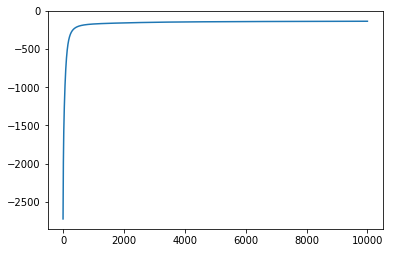

In [103]:
plt.plot(cost)

In [110]:
(y.argmax(axis=1)-y_pred.argmax(axis=1)).sum()

6

In [78]:
a=np.array([[1,2,3,4]])
b=np.array([[3]])

In [79]:
a*b

array([[ 3,  6,  9, 12]])

array([[-7.08010461e-04, -5.87618892e-02,  1.11624919e-03,
         3.69558443e-05],
       [ 4.27374242e-03, -1.77350113e-02,  2.36311800e-03,
         2.97609043e-03],
       [ 8.12447854e-04, -2.22371321e-03,  1.70862407e-04,
         8.80929080e-06],
       ...,
       [ 4.46299702e-02,  6.20276595e-02, -2.28369860e-01,
        -8.16476585e-02],
       [ 7.97847849e-02, -8.35133344e-02, -1.15169860e-01,
        -1.09009901e-04],
       [ 2.89037107e-04,  6.73099564e-03, -7.38212054e-03,
        -6.38875812e-03]])

In [85]:
Z_pred.shape

(1500, 4)